# ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

### HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

## В процессе своего анализа мы должны:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы от бизекса, представленного HR-агентством:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
- Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;
- тест для категориальных признаков.

Результатом вашей работы должен стать ноутбук (IPYNB-файл) с кодом для исследования, а также с выводами и рассуждениями, полученными на основе разведывательного анализа.

#### Описание

- work_year - Год, в котором была выплачена зарплата.
- experience_level - Опыт работы на этой должности в течение года со следующими возможными значениями:
* *EN* — Entry-level/Junior; 
* *MI* — Mid-level/Intermediate;
* *SE* — Senior-level/Expert;
* *EX* —  Executive-level/Director.

- employment_type - Тип трудоустройства для этой роли:
* *PT* — неполный рабочий день;
* *FT* — полный рабочий день;
* *CT* — контракт;
* *FL* — фриланс

- job_title - Роль, в которой соискатель работал в течение года.
- salary - Общая выплаченная валовая сумма заработной платы.
- salary_currency - Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
- salary_in_usd - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
- employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

- remote_ratio - Общий объём работы, выполняемой удалённо. Возможные значения:
* *0* — удалённой работы нет (менее 20 %);
* *50* — частично удалённая работа;
* *100* — полностью удалённая работа (более 80 %)

- company_location - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166
- company_size - Среднее количество людей, работавших в компании в течение года:
* *S* — менее 50 сотрудников (небольшая компания);
* *M* — от 50 до 250 сотрудников (средняя компания);
* *L* — более 250 сотрудников (крупная компания).

## 1.Загрузка и обработка данных

### Импорт необходимых библиотек и загрузка данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
sns.set_theme("notebook")
sns.set_palette("Set2")

In [2]:
data=pd.read_csv('data/ds_salaries.csv')
data.head(10) # смотрим первые 10 строк нашего сета

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [3]:
# устанавливаем уровень альфа значимости
alpha=0.05
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


### Проверка данных на пустые значения, дубликаты и корректность типов данных

In [4]:
data.info() # смотрим краткое инфо по сэту

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
# проверяем данные на дубликаты
dubl=data[data.duplicated()].shape[0]
print('Количество дубликатов в сете:', dubl)

Количество дубликатов в сете: 0


Вывод: в датасете 607 записей. Пустые значения и дубликаты отсутствуют. Корректность данных тоже в норме, отклонений не выявил, на первый взгляд каждому из признаков соотвествует свой тип данных.

### Неинформационные столбцы

Вывод: судя по всему информация из признаков "salary" и "salary_currency" абсолютно неинформативна, так как есть признак "salary_in_usd", который сводит их к общему знаменателю.
Так же 1-ый столбец не несет никакой информации

In [6]:
# дропнем неинформационные признаки
data.drop(data.columns[[0,5,6]], axis=1, inplace=True)
data.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


### Классификация на категориальные и числовые признаки

In [7]:
# Для классификации признаков решил посмотреть на кол-во уникальных значений в признаках
year=data['work_year'].unique().__len__()
print("Кол-во уникальных значений в признаке 'год выплаты з/п'=", year)
job=data['job_title'].unique().__len__()
print("Кол-во уникальных значений в признаке 'роль, в которой соискатель работал в течении года'=", job)
country=data['employee_residence'].unique().__len__()
print("Кол-во уникальных значений в признаке 'основная страна проживания сотрудника'=", country)
company_location=data['company_location'].unique().__len__()
print("Кол-во уникальных значений в признаке 'страна глаавного офиса работодателя'=", company_location)

Кол-во уникальных значений в признаке 'год выплаты з/п'= 3
Кол-во уникальных значений в признаке 'роль, в которой соискатель работал в течении года'= 50
Кол-во уникальных значений в признаке 'основная страна проживания сотрудника'= 57
Кол-во уникальных значений в признаке 'страна глаавного офиса работодателя'= 50


Вывод: на самом деле можно было не производить выше описанную процедуру, а обратить внимание на инфо о нашем сэте.

К числовым признакам относятся:
- *Salary*, но я не буду им пользоваться, считаю что он не информативен
- *Salary_currency*, так же считаю его не пригодным для дальнейшей работы
- *Salary_in_usd* вроде как основной признак, вокруг которого будет строится анализ

К категориальным признакам относятся:

Все оставшиеся признаки. Прнадлежность признаков *experience_level, employment_type, remote_ratio, company_size* в принципе проглядывалась в описании признаков к заданию(в описании признаков уже указана классификация значений на группы). Признаки *work_year, job_title, employee_residence, company_location* показали свою принадлежность проверкой проделанной выше

# 2.1 Основные статистические характеристики для признаков + визуальный анализ данных

### Смотрим основной признак "Заработная плата в USD"(salary_in_usd)

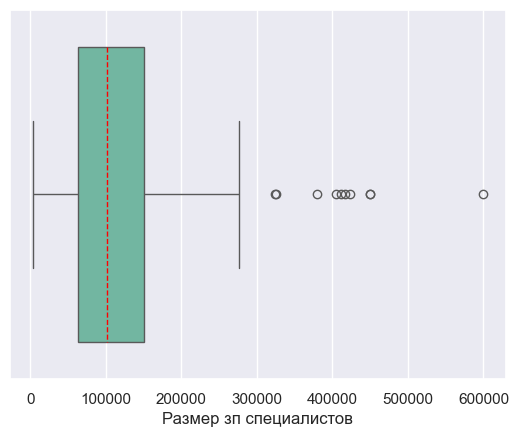

In [77]:
# для начала просто глянем распределение
ax=sns.boxplot(data['salary_in_usd'], orient='h', medianprops={"color": "red", "linestyle": "--"})
ax.set(xlabel='Размер зп специалистов')
plt.show()

In [9]:
# более краткое описание признака
money_agg=data['salary_in_usd'].describe().round(1).to_frame()
money_agg.columns=['Размер зп специалистов DS']
money_agg

,Размер зп специалистов DS
count,607.0
mean,112297.9
std,70957.3
min,2859.0
25%,62726.0
50%,101570.0
75%,150000.0
max,600000.0


Предварительный вывод: присутствует много выбросов

### Смотрим признак "Год, в котором была выплачена зарплата"(work_year)

In [10]:
# посмотрим на кол-во записей зафиксированных по каждому году
data['work_year'].value_counts()

work_year
2022    318
2021    217
2020     72
Name: count, dtype: int64

Text(0, 0.5, 'Количество')

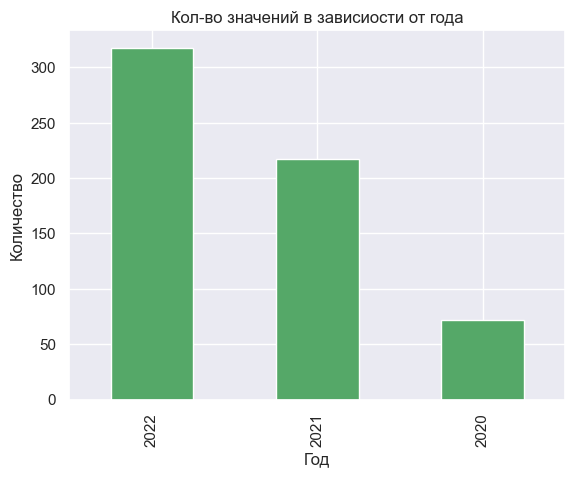

In [11]:
# для лучшей восприимчивости отобразим этот признак визуально
data['work_year'].value_counts().plot.bar(color="g")
plt.title("Кол-во значений в зависиости от года")
plt.xlabel("Год")
plt.ylabel("Количество")

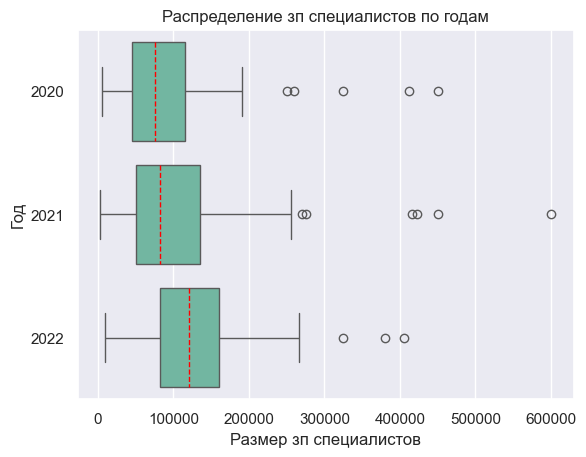

In [12]:
# решил посмотреть на динамику зп с течением времени
ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зп специалистов', ylabel='Год')
plt.title('Распределение зп специалистов по годам')
plt.show()

In [13]:
data_work_year_agg=data.groupby('work_year')['salary_in_usd'].describe().round(1)
print('Распределение зп специалистов в зависимости от года')
data_work_year_agg

Распределение зп специалистов в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.0,82831.8,5707.0,45724.5,75544.0,115526.0,450000.0
2021,217.0,99853.8,80225.1,2859.0,50000.0,82528.0,135000.0,600000.0
2022,318.0,124522.0,58183.6,10000.0,81666.0,120000.0,160000.0,405000.0


Предварительный вывод по признаку "work_year": кол-во значений растет в динамике от года к году, не понятно есть ли смысл включать значения 2020 года(72 значения), по причине их невысокого количества относительно 2022 году(318 значений). Так же видна положительная динамика по росту зп у специалистов; наблюдается стабилизация отклонений в зп по 2022 году в отличии от предыдущих годов

### Смотрим признак "Опыт работы на этой должности в течение года"(experience_level)

In [14]:
# посмотрим кол-во записей по каждой позиции
data['experience_level'].value_counts()

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

Text(0, 0.5, 'Количество')

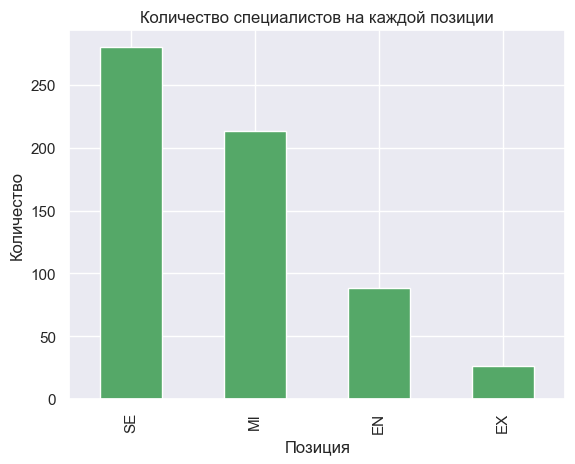

In [15]:
# отобразим на гистограме, для лучшего восприятия
data['experience_level'].value_counts().plot.bar(color='g')
plt.title("Количество специалистов на каждой позиции")
plt.xlabel("Позиция")
plt.ylabel("Количество")

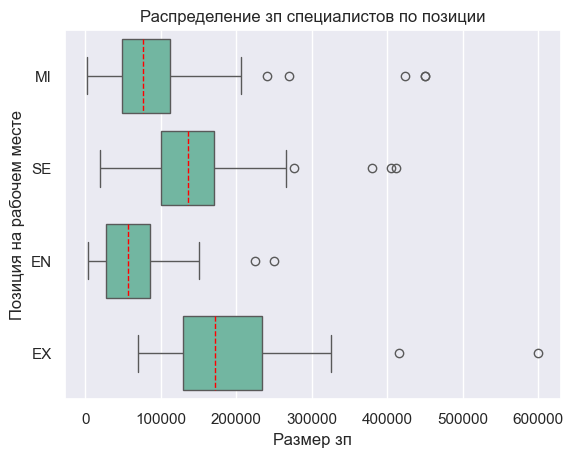

In [16]:
# глянем на зп в зависимости от позиции на рабочем месте
ax = sns.boxplot(data, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зп', ylabel='Позиция на рабочем месте')
plt.title('Распределение зп специалистов по позиции')
plt.show()

In [17]:
data_experience_level_agg=data.groupby('experience_level')['salary_in_usd'].describe().round(1)
print('Распределение зп специалистов в зависимости от позиции')
data_experience_level_agg

Распределение зп специалистов в зависимости от позиции


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.3,44395.5,4000.0,27505.0,56500.0,85425.8,250000.0
EX,26.0,199392.0,117071.3,69741.0,130006.5,171437.5,233750.0,600000.0
MI,213.0,87996.1,63901.1,2859.0,48000.0,76940.0,112000.0,450000.0
SE,280.0,138617.3,57692.0,18907.0,100000.0,135500.0,170000.0,412000.0


Предварительный вывод по признаку "experience_level": выбросы присутствуют по всем категориями. Предварительно видна очевидная картина по уровню зп с точки зрения иерархии IT специалистов(чем выше уровень занимающей должности, тем выше зп). 

### Смотрим признак "Тип трудоустройства для этой роли"(employment_type)

In [18]:
# глянем кол-во записей по типам
data['employment_type'].value_counts()

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

Text(0, 0.5, 'Количество специалистов')

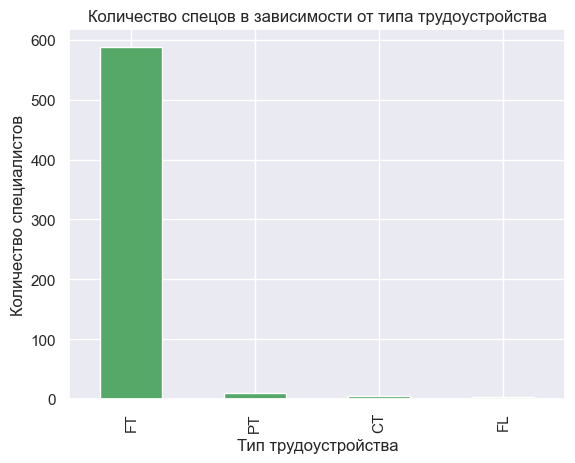

In [19]:
# отобразим на графике
data['employment_type'].value_counts().plot.bar(color='g')
plt.title("Количество спецов в зависимости от типа трудоустройства")
plt.xlabel("Тип трудоустройства")
plt.ylabel("Количество специалистов")

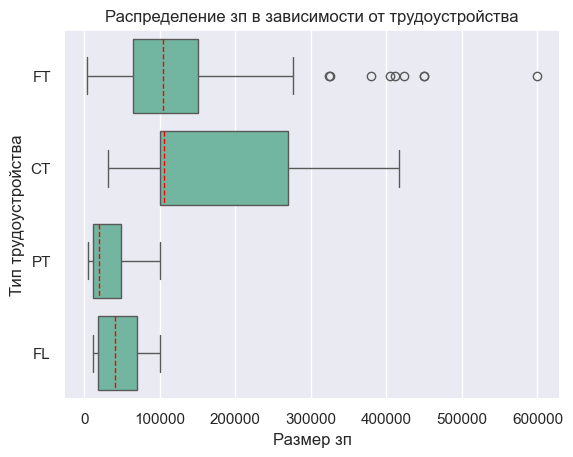

In [20]:
# посмотрим распередление зп в зависимости от типа трудоустройства
ax = sns.boxplot(data, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": "--"})
ax.set(xlabel='Размер зп', ylabel='Тип трудоустройства')
plt.title('Распределение зп в зависимости от трудоустройства')
plt.show()

In [21]:
data_employement_type_agg=data.groupby('employment_type')['salary_in_usd'].describe().round(1)
print('Распределение зп в зависимости от типа трудоустройства')
data_employement_type_agg

Распределение зп в зависимости от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,5.0,184575.0,156250.9,31875.0,100000.0,105000.0,270000.0,416000.0
FL,4.0,48000.0,40529.8,12000.0,18000.0,40000.0,70000.0,100000.0
FT,588.0,113468.1,69476.5,2859.0,64962.2,104196.5,150000.0,600000.0
PT,10.0,33070.5,31472.9,5409.0,12000.0,18817.5,48370.0,100000.0


Предварительный вывод по признаку "employment_level": выбросы в зп присутствуют только по категории специалистов, которые сидят на FT-графике, так же видим подавляющее кол-во специалистов этой группы, относительно остальных из этой выборки. Так же наблюдается необычный разброс зп среди специалистов на графике CT, но это ни о чем не говорит, так как в данной выборке таких специалистов меннее 1%.

**Предварительно предположу что специалистов с графиками CT, FL и PT сильно рассматривать нет необходимости(просто их всех вместе всего 3% от всех)**

### Смотрим признак "Роль, в которой соискатель работал в течении года"(job_title)

In [22]:
# глянем на кол-во специалистов по ролям, которые участвуют в выборке
data['job_title'].value_counts().sort_values(ascending=False)

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Data Analytics Manager                        7
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [23]:
# ожидаемая картина, скинем всё что за рамками топ-4 в категорию "other". Но портить основной сэт не будем
data_job_title_vision=data.copy()
job_title_list={'Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer'} # выделим топ-4 в список 
data_job_title_vision['job_title']=data['job_title'].apply(lambda x: x if x in job_title_list else 'Other')
# снова глянем как выглядит кол-во записей в зависимости от роли
data_job_title_vision['job_title'].value_counts().sort_values(ascending=False)

job_title
Other                        194
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Name: count, dtype: int64

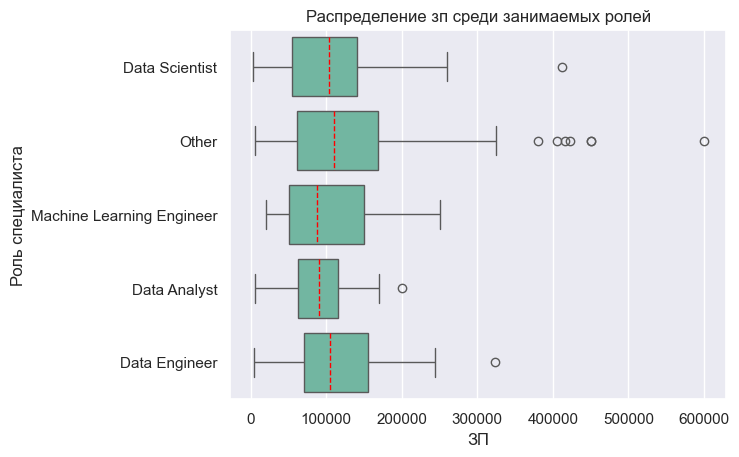

In [24]:
# глянем рассматриваемый признак в модифицированном сэте с учётом зп
ax=sns.boxplot(data_job_title_vision, x='salary_in_usd', y='job_title', orient='h', medianprops={"color": "red", "linestyle": "--"})
ax.set(xlabel="ЗП")
ax.set(ylabel="Роль специалиста")
plt.title("Распределение зп среди занимаемых ролей")
plt.show()

In [25]:
data_job_title_vision_agg=data_job_title_vision.groupby('job_title')['salary_in_usd'].describe().round(1)
print("Уровень зп в зависимости от роли")
data_job_title_vision_agg.sort_values(by='count', ascending=False)

Уровень зп в зависимости от роли


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Other,194.0,126306.9,92180.3,5409.0,61041.8,110000.0,167968.8,600000.0
Data Scientist,143.0,108187.8,64112.8,2859.0,54724.0,103691.0,140850.0,412000.0
Data Engineer,132.0,112725.0,57629.1,4000.0,70039.5,105500.0,154600.0,324000.0
Data Analyst,97.0,92893.1,39961.1,6072.0,62000.0,90320.0,116150.0,200000.0
Machine Learning Engineer,41.0,104880.1,63218.6,20000.0,51064.0,87932.0,150000.0,250000.0


In [26]:
# так же посмотрим на статистические данные, но перед этим решил привезти ЗП к знаменателю x/1000, сделал это потому что не понял как в дальнейшем в 
# тепловой карте настроить отображние ячеек для комфортного чтения =(((
data_job_title_vision_1k=data_job_title_vision.copy()
data_job_title_vision_1k['salary_in_usd']=data_job_title_vision['salary_in_usd'].apply(lambda x: x/1000)
# статистические данные по признаку job_title
data_job_title_vision_1k_agg=data_job_title_vision_1k.groupby('job_title')['salary_in_usd'].describe().round()
data_job_title_vision_1k_agg

,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Analyst,97.0,93.0,40.0,6.0,62.0,90.0,116.0,200.0
Data Engineer,132.0,113.0,58.0,4.0,70.0,106.0,155.0,324.0
Data Scientist,143.0,108.0,64.0,3.0,55.0,104.0,141.0,412.0
Machine Learning Engineer,41.0,105.0,63.0,20.0,51.0,88.0,150.0,250.0
Other,194.0,126.0,92.0,5.0,61.0,110.0,168.0,600.0


[Text(0.5, 44.249999999999986, 'Год'),
 Text(54.749999999999986, 0.5, 'Занимаемая должность/роль')]

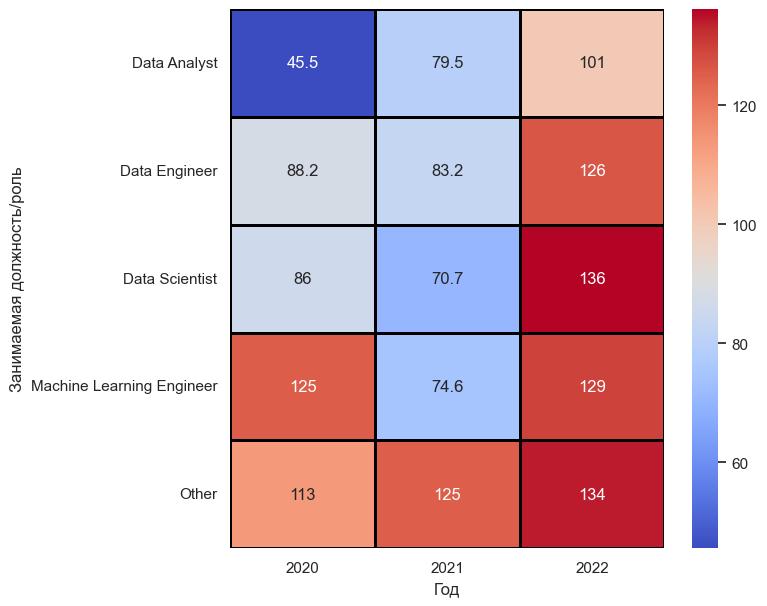

In [27]:
# построим тепловую карту, в голове держим что данные по зп у нас это 1х1000:
data_heatmap_job_title=pd.pivot_table(data_job_title_vision_1k, values='salary_in_usd', index='job_title', columns='work_year')
fig, ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(data_heatmap_job_title, linewidths=1, linecolor='black', annot=True, fmt="-.3g", cmap='coolwarm')
ax.set(xlabel="Год", ylabel="Занимаемая должность/роль")

In [28]:
# решил глянуть позицию с максимальный уровенем зп(ранее мы уже узнали из описания что она max по признаку ЗП равен "600000")
data.loc[data['salary_in_usd']==600000]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
252,2021,EX,FT,Principal Data Engineer,600000,US,100,US,L


Предварительный вывод по признаку "Занимаемая роль": по категорим присутствуют выбросы, предварительно видно что зп с течением времени растет практически по всем нашим выделенным категориям ТОП-5, группа Other выбивается относительно остальных скорее всего из-за выбросов(тем более в её статистику вошел тот самый максимум с зп 600000 долларов)

### Смотрим признак "Страна проживания сотрудника"(employee_residence)

In [30]:
# поступим тут как и с предыдущим признаком, выделим ТОП-5, остальных в "Other", но портить основной сэт не будем
data_employee_residence_vision=data.copy()
employee_residence_list={"US","GB","IN","CA","DE"} # список для выделения топ-5
data_employee_residence_vision["employee_residence"]=data["employee_residence"].apply(lambda x: x if x in employee_residence_list else 'Other')
# ну и глянем теперь на модифицированный сэт
data_employee_residence_vision["employee_residence"].value_counts(ascending=False)

employee_residence
US       332
Other    147
GB        44
IN        30
CA        29
DE        25
Name: count, dtype: int64

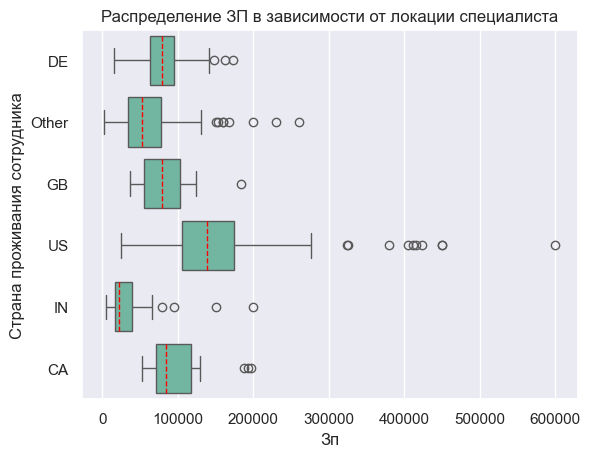

In [31]:
# глянем рассматриваемый признак в модифицированном сэте с учётом зп
ax=sns.boxplot(data_employee_residence_vision, x='salary_in_usd', y='employee_residence', orient="h", medianprops={"color":"red", "linestyle":"--"})
ax.set(xlabel="Зп")
ax.set(ylabel="Страна проживания сотрудника")
ax.set_title("Распределение ЗП в зависимости от локации специалиста")
plt.show()

In [32]:
# ну и снова приведем зп к знаменателю x/1000
data_employee_residence_vision_1k=data_employee_residence_vision.copy()
data_employee_residence_vision_1k['salary_in_usd']=data_employee_residence_vision["salary_in_usd"].apply(lambda x:x/1000)
data_employee_residence_vision_1k
# смотрим что получилось далее

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79.833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260.000,Other,0,JP,S
2,2020,SE,FT,Big Data Engineer,109.024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20.000,Other,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150.000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154.000,US,100,US,M
603,2022,SE,FT,Data Engineer,126.000,US,100,US,M
604,2022,SE,FT,Data Analyst,129.000,US,0,US,M
605,2022,SE,FT,Data Analyst,150.000,US,100,US,M


In [33]:
# посмотрим на зп в зависимости от локации специалиста
data_employee_residence_vision_1k_agg=data_employee_residence_vision_1k.groupby("employee_residence")["salary_in_usd"].describe().round(1)
print("Зп в зависимости от локации специалиста")
data_employee_residence_vision_1k_agg

Зп в зависимости от локации специалиста


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
CA,29.0,97.1,39.8,52.0,70.9,85.0,117.1,197.0
DE,25.0,85.6,39.4,16.0,62.7,79.2,94.6,173.8
GB,44.0,81.4,29.9,37.3,55.8,78.5,103.5,183.2
IN,30.0,37.3,43.7,5.4,16.4,22.1,38.8,200.0
Other,147.0,61.1,42.1,2.9,34.6,53.2,77.2,260.0
US,332.0,149.2,68.3,25.0,105.8,138.5,175.0,600.0


[Text(0.5, 44.249999999999986, 'Год'),
 Text(54.75, 0.5, 'Локация сотрудника/страна проживания')]

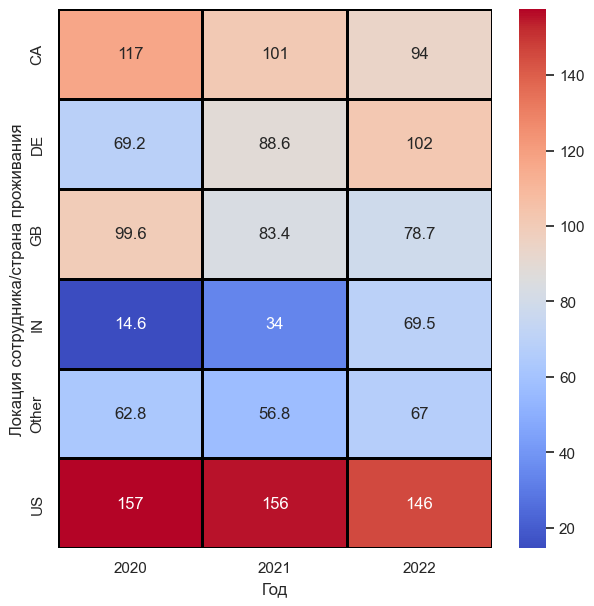

In [34]:
# телловая карта для признака по проживанию сотрудника, ЗП уже приведена к знаменателю x/1000 и отсортировна по топ-5
data_heatmap_employee_residence=pd.pivot_table(data_employee_residence_vision_1k, values='salary_in_usd', index='employee_residence', columns='work_year')
fig, ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(data_heatmap_employee_residence, linewidths=1, linecolor='black', annot=True, fmt="-.3g", cmap='coolwarm')
ax.set(xlabel="Год", ylabel="Локация сотрудника/страна проживания")

Предварительный вывод: очень забавная картина - в GB и CA, в период 2020-2022 наблюдается отрицательная динамика по зп, в то время как в странах IN и DE зп плавно возросла(в IN она возрасла в арифметической прогрессии). В остальном же мире по зп наблюдается почти "штиль" с течением времени. Это картина является диаметрально-противоположной предыдущей тепловой карте...что наталкивает на интересную мысль: **с течением времени зп в US и CA падала по возможной причине появления большого количества специалистов с малым опытом работы, соответсвенно и зп у них была не высокая, поэтому это сильно повлияло на общую статистику по зп в US**

### Смотрим признак "Объем работы выполняемый удаленно"(remote_ratio)

In [35]:
# посмотрим количество записей по категориям
data['remote_ratio'].value_counts()

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

Text(0, 0.5, 'Кол-во записей')

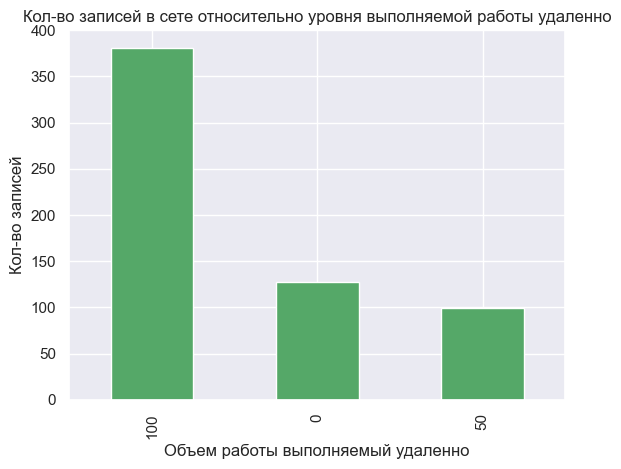

In [36]:
# чтобы в памяти не держать эти числа, нанесем на могучие колонки данное инфо
data['remote_ratio'].value_counts().plot.bar(color="g")
plt.title("Кол-во записей в сете относительно уровня выполняемой работы удаленно")
plt.xlabel("Объем работы выполняемый удаленно")
plt.ylabel("Кол-во записей")

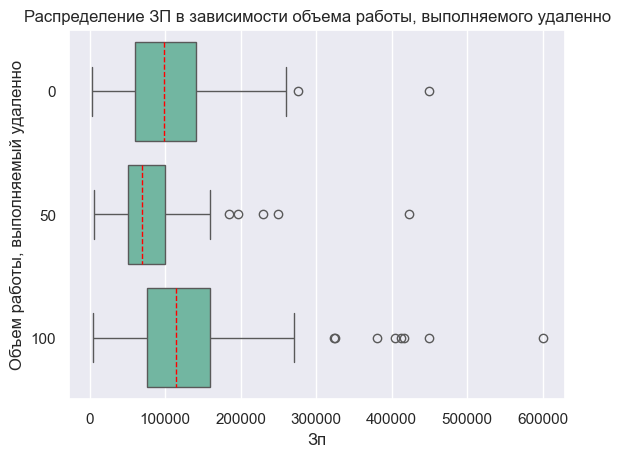

In [37]:
# посмотрим на этот признак с учётом зп
ax=sns.boxplot(data, x='salary_in_usd', y='remote_ratio', orient="h", medianprops={"color":"red", "linestyle":"--"})
ax.set(xlabel="Зп")
ax.set(ylabel="Объем работы, выполняемый удаленно")
ax.set_title("Распределение ЗП в зависимости объема работы, выполняемого удаленно")
plt.show()

In [38]:
data_remote_ratio_agg=data.groupby("remote_ratio")["salary_in_usd"].describe().round(1)
print("Уровень зп в зависимости от объема работ, выполняемого удаленно")
data_remote_ratio_agg.sort_values(by='count', ascending=False)

Уровень зп в зависимости от объема работ, выполняемого удаленно


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
100,381.0,122457.5,72710.8,4000.0,75774.0,115000.0,160000.0,600000.0
0,127.0,106354.6,67724.5,2859.0,60000.0,99000.0,140400.0,450000.0
50,99.0,80823.0,57353.1,5409.0,50355.0,69999.0,99851.5,423000.0


Предварительный вывод: выбросы присутствуют по всем группам, в целом принимаем, что 100% удаленная работа немного влияет на уровень ЗП

### Смотрим признак "Страна главного офиса/филиала компании"(company_location)

In [39]:
# глянем на кол-во записей по группам
data['company_location'].value_counts()

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: count, dtype: int64

In [40]:
# снова выделим топ-стран, остальных в "Other", но не в основном датасете
data_company_location_vision=data.copy()
company_location_list={"US","DE","IN","CA","GB"} # список топ-стран
data_company_location_vision["company_location"]=data["company_location"].apply(lambda x: x if x in company_location_list else "Other")
# ну и глянем как это выглядит
data_company_location_vision["company_location"].value_counts()

company_location
US       355
Other    123
GB        47
CA        30
DE        28
IN        24
Name: count, dtype: int64

In [41]:
# глянем на наш топ-6 в зависимости от зп
data_company_location=data_company_location_vision.groupby("company_location")["salary_in_usd"].describe().round(1)
print("Зп в зависимости от локации компании")
data_company_location.sort_values(by="count", ascending=False)

Зп в зависимости от локации компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
US,355.0,144055.3,69906.9,5679.0,100000.0,135000.0,170000.0,600000.0
Other,123.0,58677.0,41560.4,2859.0,32974.0,50180.0,75535.0,260000.0
GB,47.0,81583.0,29524.0,37300.0,57575.0,78526.0,103931.0,183228.0
CA,30.0,99823.7,46329.1,52000.0,69730.0,81895.5,117916.2,225000.0
DE,28.0,81887.2,39195.9,15966.0,58986.0,78015.0,90734.0,173762.0
IN,24.0,28581.8,22697.7,5409.0,16735.0,22124.0,32163.2,94665.0


In [42]:
# ну и снова приведем зп к знаменателю x/1000
data_company_location_vision_1k=data_company_location_vision.copy()
data_company_location_vision_1k['salary_in_usd']=data_company_location_vision["salary_in_usd"].apply(lambda x:x/1000)
data_company_location_vision_1k
# смотрим что получилось далее

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79.833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260.000,JP,0,Other,S
2,2020,SE,FT,Big Data Engineer,109.024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20.000,HN,0,Other,S
4,2020,SE,FT,Machine Learning Engineer,150.000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154.000,US,100,US,M
603,2022,SE,FT,Data Engineer,126.000,US,100,US,M
604,2022,SE,FT,Data Analyst,129.000,US,0,US,M
605,2022,SE,FT,Data Analyst,150.000,US,100,US,M


In [43]:
data_company_location_vision_1k_agg=data_company_location_vision_1k.groupby("company_location")["salary_in_usd"].describe().round(1)
print("Зп в зависимости от локации компании")
data_company_location_vision_1k_agg

Зп в зависимости от локации компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
CA,30.0,99.8,46.3,52.0,69.7,81.9,117.9,225.0
DE,28.0,81.9,39.2,16.0,59.0,78.0,90.7,173.8
GB,47.0,81.6,29.5,37.3,57.6,78.5,103.9,183.2
IN,24.0,28.6,22.7,5.4,16.7,22.1,32.2,94.7
Other,123.0,58.7,41.6,2.9,33.0,50.2,75.5,260.0
US,355.0,144.1,69.9,5.7,100.0,135.0,170.0,600.0


[Text(0.5, 44.249999999999986, 'Год'),
 Text(54.75, 0.5, 'Локация главного офиса/филиала компании')]

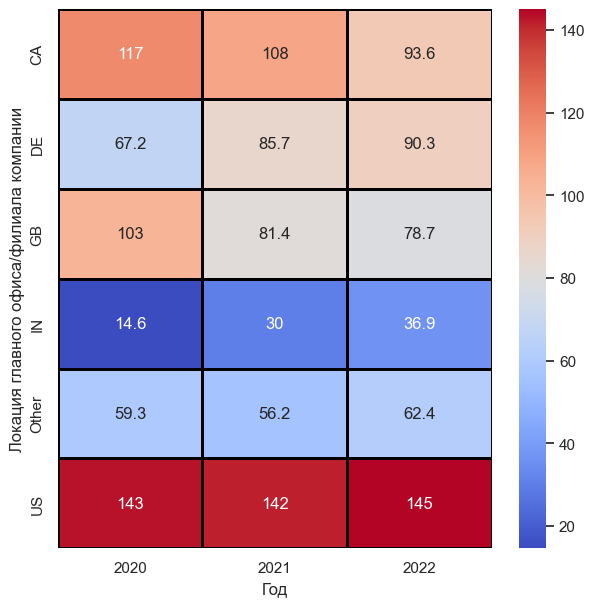

In [44]:
# телловая карта для признака по локации главного офиса/филиала компании, ЗП уже приведена к знаменателю x/1000
data_heatmap_company_location=pd.pivot_table(data_company_location_vision_1k, values='salary_in_usd', index='company_location', columns='work_year')
fig, ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(data_heatmap_company_location, linewidths=1, linecolor='black', annot=True, fmt="-.3g", cmap='coolwarm')
ax.set(xlabel="Год", ylabel="Локация главного офиса/филиала компании")

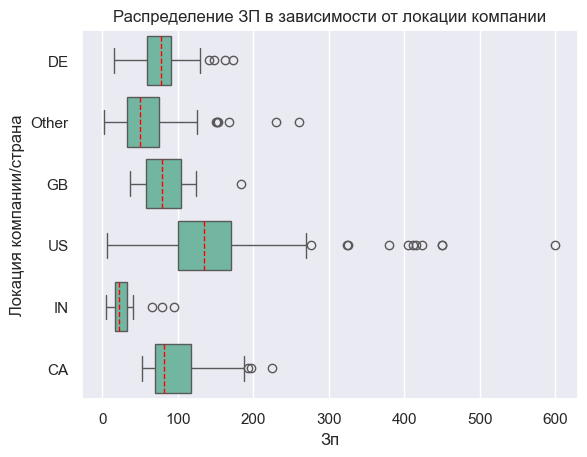

In [45]:
# глянем на распределение с учётом зп
ax=sns.boxplot(data_company_location_vision_1k, x='salary_in_usd', y='company_location', orient="h", medianprops={"color":"red", "linestyle":"--"})
ax.set(xlabel="Зп")
ax.set(ylabel="Локация компании/страна")
ax.set_title("Распределение ЗП в зависимости от локации компании")
plt.show()

Предварительный вывод: выбросы присутствуют по всем группам в данном признаке, опять же самые выгодные условия по зп у компаний, которые находятся в US. Что касается роста зп по странам - видна положительная динамика в IN и DE, чего не скажешь о CA и GB, там наблюдается отрицательная динамика по зп с течением времени. ***!: в US по данному признаку нет ни роста ни снижения ЗП, хотя по предыдущей тепловой карте (признак "страна проживания сотрудника") мы наблюдали отрицательную динамику по зп с течением времени, возможно это может говорить о том, что либо специалисты проживающие в US начали менять компании, которые находятся в US на компании из других стран, что и сказалось на их ЗП в худшую сторону, либо этих специалистов из US выдавили специалисты из других стран, (это бы объясняло тот не реальный рост зп у специалистов из IN)***

### Смотрим признак "Среднее кол-во сотрудников, работающих в компании"(company_size)

In [46]:
# ну по классике
data["company_size"].value_counts()

company_size
M    326
L    198
S     83
Name: count, dtype: int64

Text(0, 0.5, 'Кол-во записей')

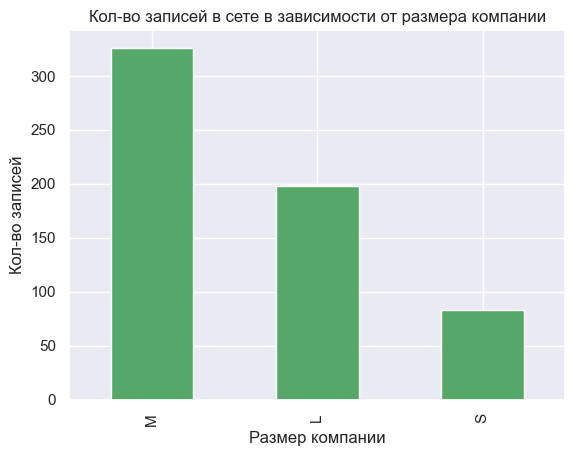

In [47]:
# накинем для визуального эффекта
data['company_size'].value_counts().plot.bar(color='g')
plt.title('Кол-во записей в сете в зависимости от размера компании')
plt.xlabel('Размер компании')
plt.ylabel('Кол-во записей')

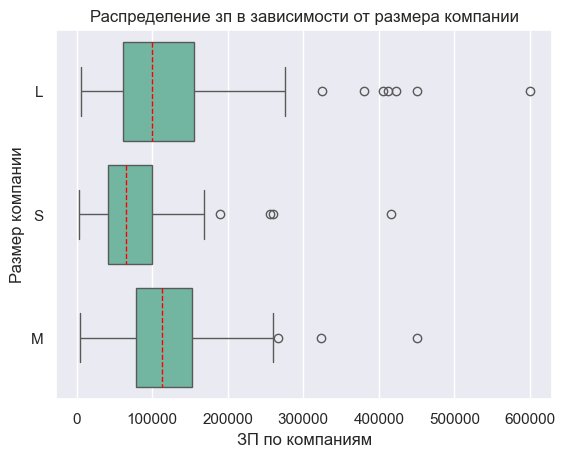

In [48]:
# теперь глянем с учётом зп
ax = sns.boxplot(data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='ЗП по компаниям', ylabel='Размер компании')
plt.title('Распределение зп в зависимости от размера компании')
plt.show()

In [49]:
data_company_size_agg=data.groupby('company_size')["salary_in_usd"].describe().round(1)
print("Распределение зп в зависимости от размера компании")
data_company_size_agg.sort_values(by="count", ascending=False)

Распределение зп в зависимости от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
M,326.0,116905.5,59287.7,4000.0,78131.5,113188.0,152875.0,450000.0
L,198.0,119243.0,86156.7,5882.0,61041.8,100000.0,154600.0,600000.0
S,83.0,77632.7,63461.7,2859.0,41943.0,65000.0,100000.0,416000.0


In [50]:
# ну и снова приведем зп к знаменателю x/1000
data_company_size_1k=data.copy()
data_company_size_1k['salary_in_usd']=data["salary_in_usd"].apply(lambda x:x/1000)
data_company_size_1k

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79.833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260.000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109.024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20.000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150.000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154.000,US,100,US,M
603,2022,SE,FT,Data Engineer,126.000,US,100,US,M
604,2022,SE,FT,Data Analyst,129.000,US,0,US,M
605,2022,SE,FT,Data Analyst,150.000,US,100,US,M


[Text(0.5, 44.249999999999986, 'Год'), Text(54.75, 0.5, 'Размер компании')]

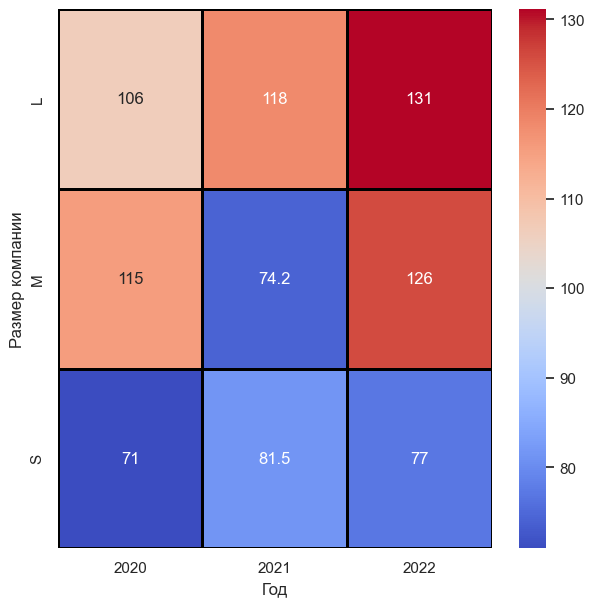

In [51]:
# телловая карта для признака по размеру компании, ЗП уже приведена к знаменателю x/1000
data_heatmap_company_size=pd.pivot_table(data_company_size_1k, values='salary_in_usd', index='company_size', columns='work_year')
fig, ax=plt.subplots(figsize=(7,7))
ax=sns.heatmap(data_heatmap_company_size, linewidths=1, linecolor='black', annot=True, fmt="-.3g", cmap='coolwarm')
ax.set(xlabel="Год", ylabel="Размер компании")

Предварительный вывод: выбросы присутствуют по всем группам. ЗП в S-компаниях с течением времени не менялась, какой-то непонятный провал виден по M-компаниям, ну и значительный рост зп по L-компаниям

# Первичные предварительные ответы на вопрос: «Какие факторы влияют на заработную плату?»

Если не смотреть на фатор времени, а рассматривать первично каждый признак как фактор, и принять период 2020-2023 за одно целое(т.е. рассматривать весь период как единицу) то видно влияние следующих факторов на ЗП:
- опыт работы на должности в течении года;
- страна проживания сотрудника;
- страна главного офиса работадателя;
- среднее количество людей, работающих в компании;
- объем работы, выполняемый удаленно.

# 2. Статистический анализ данных

In [99]:
# Закинем функцию для принятия решения о нормальности:
def decision_normality(p):
    print('p-value= {:.3}'.format(p))
    if p <=alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))

# Так же подкинем функцию для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Вспомним основные вопросы от бизнеса:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

## Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер зп у специалистов Data Scientist в 2023 году ($μ_1$) статистически меньше, либо равен размеру зп специалистов Data Science в 2020 ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зп у специалистов Data Scientist в 2023 году ($μ_1$) статистически больше, размер зп у специалистов Data Scientist в 2020 году ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

Для проверки гипотез, проверим признак "salary_in_usd" на нормальность

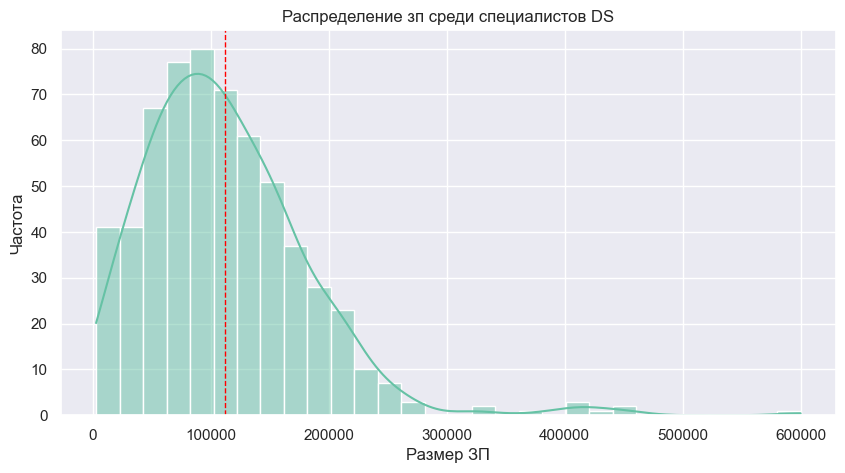

In [83]:
# Для выявления нормальности признака построим гистограмму
fig, axes = plt.subplots(figsize=(10, 5))
ax = sns.histplot(data['salary_in_usd'], bins=30, kde=True)
ax.set(xlabel='Размер ЗП', ylabel='Частота')
plt.title('Распределение зп среди специалистов DS')
ax.axvline(data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=1)
plt.show()

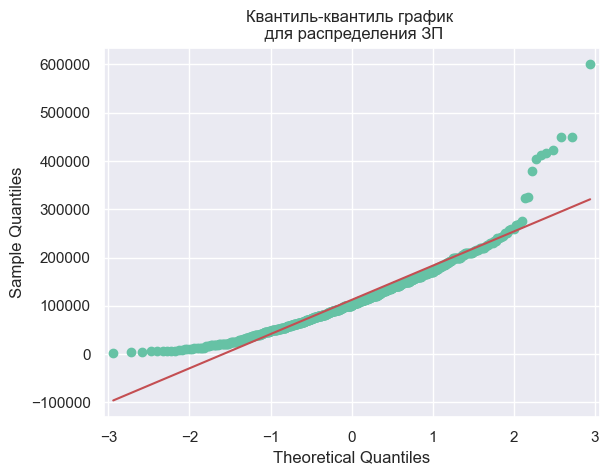

In [84]:
# дополнительно построим qq график
sm.qqplot(data['salary_in_usd'], line='s')
plt.title('Квантиль-квантиль график \n для распределения ЗП')
plt.show()

In [98]:
# распределение вроде близко к нормальному, дополнительно ещё проведем тест Шапиро-Уилка

_,p = stats.shapiro(data['salary_in_usd'])

print('p-value = %.3f' % (p))

# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

p-value = 0.000
Распределение не нормальное


Распределение не нормальное. Не совсем понял почему у меня разность показывается 0, даже если я указываю отображать результат 5 или 10 знаков после запятой...все-равно 0.

Согласно пройденной теории, для проверки гипотезы про ЗП по специалистам DS будем использовать критерий Фридмана(у нас 3 зависимые группы однойго компонента: в роли групп выстпуают года, а в роли компонента - зп специалистов Data Science)